### Assignment 3

#### Import required libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Load the dataset

In [121]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [122]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [123]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


#### Univariate Analysis

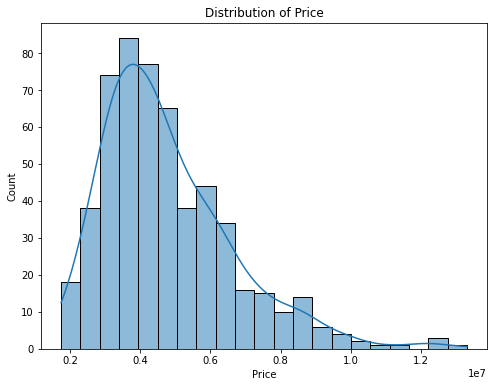

In [124]:
# Histogram - Price
plt.figure(figsize=(8, 6))
sns.histplot(data=housing, x='price', kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

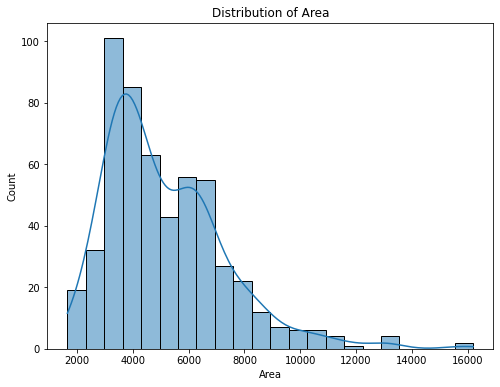

In [125]:
# Histogram - Area
plt.figure(figsize=(8, 6))
sns.histplot(data=housing, x='area', kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

#### Bi-Variate Analysis

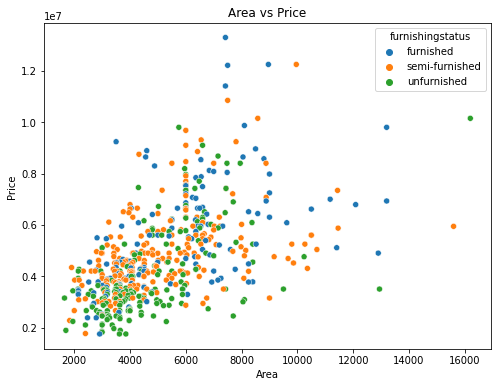

In [126]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='area', y='price', hue='furnishingstatus')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

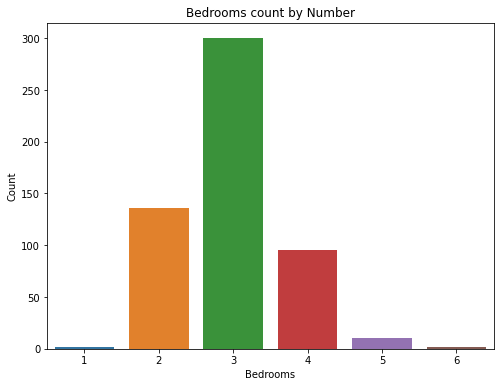

In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(data=housing, x='bedrooms')
plt.title('Bedrooms count by Number')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

#### Multi-Variate Analysis

In [128]:
corr = housing.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


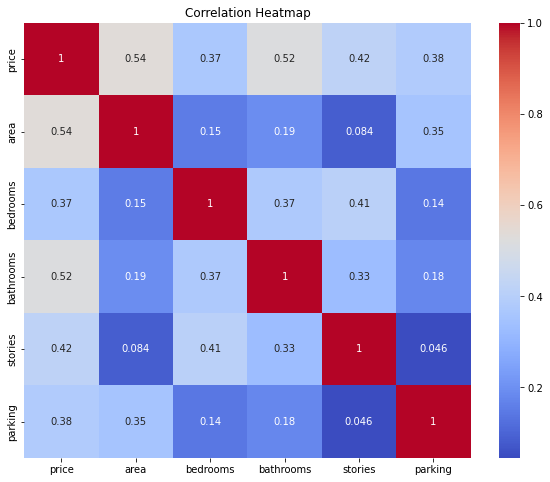

In [129]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

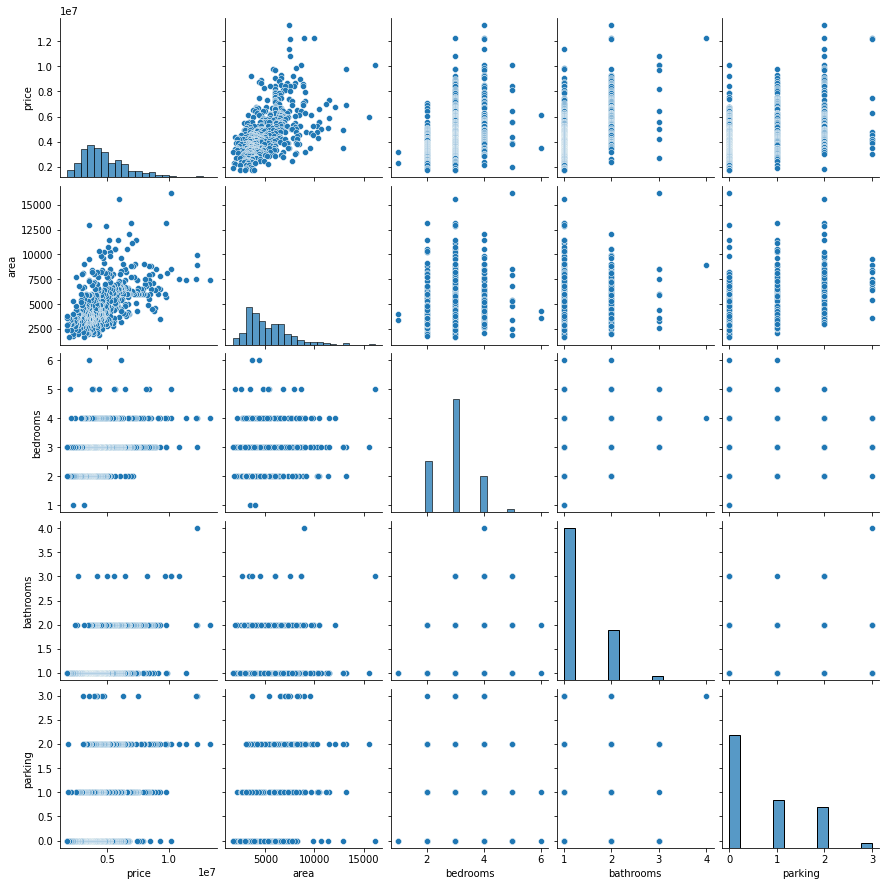

In [130]:
# Pair plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
sns.pairplot(data=housing[columns])
plt.show()

####  Perform descriptive statistics

In [131]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [132]:
housing.mean()

C:\Users\User\AppData\Local\Temp/ipykernel_37744/3409158776.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [133]:
housing.median()

C:\Users\User\AppData\Local\Temp/ipykernel_37744/2435994035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [134]:
housing.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
housing.var()

C:\Users\User\AppData\Local\Temp/ipykernel_37744/2527284353.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [136]:
housing.std()

C:\Users\User\AppData\Local\Temp/ipykernel_37744/2264156241.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

#### Check for missing values

In [137]:
housing.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

####  Find the outliers and replace them

<AxesSubplot:>

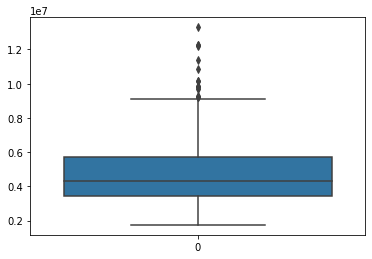

In [138]:
# price
sns.boxplot(housing['price'])

In [139]:
Q1 = housing['price'].quantile(0.25)
Q3 = housing['price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
housing['price'] = np.where(housing['price']>upper_whisker, upper_whisker, np.where(housing['price']<lower_whisker, lower_whisker, housing['price']))

<AxesSubplot:>

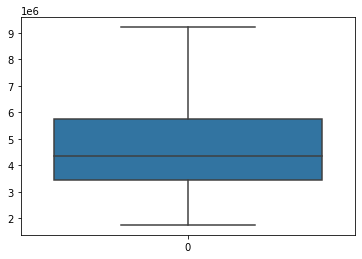

In [140]:
sns.boxplot(housing['price'])

<AxesSubplot:>

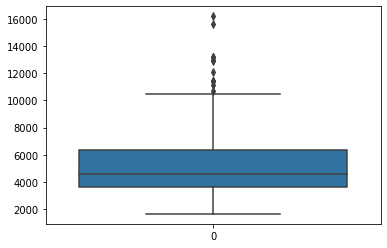

In [141]:
# area
sns.boxplot(housing['area'])

In [142]:
Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
housing['area'] = np.where(housing['area']>upper_whisker, upper_whisker, np.where(housing['area']<lower_whisker, lower_whisker, housing['area']))

<AxesSubplot:>

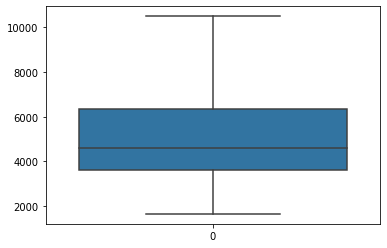

In [143]:
sns.boxplot(housing['area'])

#### Check for categorical columns and perform encoding

In [144]:
# Checking for categorical columns
categorical_columns = housing.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    housing[column] = label_encoder.fit_transform(housing[column])

In [145]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0


#### Split the data into dependent and independent variables

In [146]:
X = housing.drop('price', axis=1)  # Independent variables
y = housing['price']  # Dependent variable

In [147]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4,2,3,1,0,0,0,1,2,0
1,8960.0,4,4,4,1,0,0,0,1,3,0
2,9960.0,3,2,2,1,0,1,0,0,2,1
3,7500.0,4,2,2,1,0,1,0,1,3,0
4,7420.0,4,1,2,1,1,1,0,1,2,0


In [148]:
y.head()

0    9205000.0
1    9205000.0
2    9205000.0
3    9205000.0
4    9205000.0
Name: price, dtype: float64

#### Scale the independent variables

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
X_scaled

array([[ 1.15658327,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.51769249, -1.40628573],
       [ 1.92506041,  1.40341936,  5.40580863, ...,  1.4726183 ,
         2.67940935, -1.40628573],
       [ 2.42407154,  0.04727831,  1.42181174, ..., -0.67906259,
         1.51769249, -0.09166185],
       ...,
       [-0.73965902, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203],
       [-1.09395692,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124, -1.40628573],
       [-0.62488646,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203]])

#### Split the data into training and testing

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [152]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.30052922  0.04727831 -0.57018671 ...  1.4726183  -0.80574124
   1.22296203]
 [-0.5550249   0.04727831 -0.57018671 ... -0.67906259 -0.80574124
  -0.09166185]
 [-0.39035123  0.04727831 -0.57018671 ... -0.67906259 -0.80574124
  -0.09166185]
 ...
 [ 0.32323469  0.04727831  1.42181174 ...  1.4726183   0.35597563
   1.22296203]
 [-0.74963924  0.04727831 -0.57018671 ... -0.67906259  0.35597563
   1.22296203]
 [ 0.74739415  0.04727831 -0.57018671 ... -0.67906259 -0.80574124
  -1.40628573]]
[[-0.55003479  0.04727831 -0.57018671 ... -0.67906259  0.35597563
  -1.40628573]
 [ 2.25440776  0.04727831 -0.57018671 ... -0.67906259  1.51769249
  -1.40628573]
 [-0.8195008   1.40341936 -0.57018671 ...  1.4726183  -0.80574124
  -0.09166185]
 ...
 [-0.87439202  0.04727831 -0.57018671 ... -0.67906259 -0.80574124
   1.22296203]
 [ 2.56379466 -1.30886273 -0.57018671 ...  1.4726183   1.51769249
   1.22296203]
 [ 0.44798747  0.04727831 -0.57018671 ...  1.4726183   1.51769249
   1.22296203]]
454    3143000.0

#### Build the Model

In [153]:
mlr = LinearRegression() # Linear Regression
ridge = Ridge() # Ridge
lasso = Lasso() # Lasso
tr_regressor = DecisionTreeRegressor(random_state=0) # Decision Tree
rf_regressor = RandomForestRegressor(n_estimators=28, random_state=0) # Random Forest

#### Train the Model

In [154]:
mlr.fit(X_train, y_train) # Linear Regression
ridge.fit(X_train, y_train) # Ridge
lasso.fit(X_train, y_train) # Lasso
tr_regressor.fit(X_train,y_train) # Decision Tree
rf_regressor.fit(X_train,y_train) # Random Forest

RandomForestRegressor(n_estimators=28, random_state=0)

#### Test the Model

In [155]:
pred_mlr = mlr.predict(X_test) # Linear Regression
pred_ridge = ridge.predict(X_test) # Ridge
pred_lasso = lasso.predict(X_test) # Lasso
pred_tr = tr_regressor.predict(X_test) # Decision Tree
pred_rf = rf_regressor.predict(X_test) # Random Forest

In [156]:
print("Multiple Linear Regression Model Score is ", round(mlr.score(X_test,y_test)*100))
print("Ridge Regression Model Score is ", round(ridge.score(X_test,y_test)*100))
print("Lasso Regression Model Score is ", round(lasso.score(X_test,y_test)*100))
print("Decision Tree Regression Model Score is ", round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ", round(rf_regressor.score(X_test,y_test)*100))

Multiple Linear Regression Model Score is  68
Ridge Regression Model Score is  68
Lasso Regression Model Score is  68
Decision Tree Regression Model Score is  24
Random Forest Regression Model Score is  63


#### Measure the performance using Metrics

In [157]:
# R2
mlr_score = r2_score(y_test, pred_mlr)
ridge_score = r2_score(y_test, pred_ridge)
lasso_score = r2_score(y_test, pred_lasso)
decision_score = r2_score(y_test, pred_tr)
rf_score = r2_score(y_test, pred_rf)

In [158]:
# MSE
mlr_mse = mean_squared_error(y_test, pred_mlr)
ridge_mse = mean_squared_error(y_test, pred_ridge)
lasso_mse = mean_squared_error(y_test, pred_lasso)
decision_mse = mean_squared_error(y_test, pred_tr)
rf_mse = mean_squared_error(y_test, pred_rf)

In [159]:
# MAE
mlr_mae = mean_absolute_error(y_test, pred_mlr)
ridge_mae = mean_absolute_error(y_test, pred_ridge)
lasso_mae = mean_absolute_error(y_test, pred_lasso)
decision_mae = mean_absolute_error(y_test, pred_tr)
rf_mae = mean_absolute_error(y_test, pred_rf)

In [161]:
# # Step 14: Define the hyperparameters to tune
# param_grid = {'fit_intercept': [True, False],
#               'normalize': [True, False]}

# # Step 15: Perform Grid Search for hyperparameter tuning
# grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
# grid_search_lr.fit(X_train, y_train)
# grid_search_r = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
# grid_search_r.fit(X_train, y_train)

# # Step 16: Get the best hyperparameters and train the model with them
# best_params_lr = grid_search_lr.best_params_
# best_params_r = grid_search_r.best_params_
# best_model_lr = LinearRegression(**best_params_lr)
# best_model_r = Ridge(**best_params_r)
# best_model_lr.fit(X_train, y_train)
# best_model_r.fit(X_train, y_train)

# # Step 17: Perform cross-validation
# cross_val_scores_lr = cross_val_score(best_model_lr, X_scaled, y, cv=5)
# cross_val_scores_r = cross_val_score(best_model_r, X_scaled, y, cv=5)

# # Step 17: Test the Model
# y_pred = best_model_lr.predict(X_test)
# ridge_yhat = best_model_r.predict(X_test)

# # Step 18: Measure Performance
# mse_lr = mean_squared_error(y_test, y_pred)
# r2_lr = r2_score(y_test, y_pred)
# mse_r = mean_squared_error(y_test, ridge_yhat)
# r2_r = r2_score(y_test, ridge_yhat)

# print('Mean Squared Error LR:', mse_lr)
# print('R-squared Score LR:', r2_lr)
# print('Cross-Validation Scores LR:', cross_val_scores_lr)
# print('Mean Squared Error R:', mse_r)
# print('R-squared Score R:', r2_r)
# print('Cross-Validation Scores R:', cross_val_scores_r)

In [160]:
models_score = pd.DataFrame({
    'Model': ['Multiple Linear Regression','Ridge Regression','Lasso Regression','Decision Tree Regression','Random Forest Regression'],
    'R2 Score': [mlr_score, ridge_score, lasso_score, decision_score, rf_score],
    'Mean Squared Error': [mlr_mse, ridge_mse, lasso_mse, decision_mse, rf_mse],
    'Mean Absolute Error': [mlr_mae, ridge_mae, lasso_mae, decision_mae, rf_mae]
})
models_score.sort_values(by='R2 Score', ascending = False)

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
1,Ridge Regression,0.678290,9.824098e+11,7.630650e+05
2,Lasso Regression,0.677976,9.833673e+11,7.636082e+05
0,Multiple Linear Regression,0.677976,9.833682e+11,7.636088e+05
4,Random Forest Regression,0.626901,1.139338e+12,8.231691e+05
3,Decision Tree Regression,0.237638,2.328035e+12,1.120747e+06
